## Ridge regression

In [1]:
# Import required packages 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
# Load car data set
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",\
          "num-of-doors", "body-style", "drive-wheels", "engine-location",\
          "wheel-base", "length", "width", "height", "curb-weight", "engine-type",\
          "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",\
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",\
          "price"]
data = pd.read_csv(url, header=None, names=headers, na_values=["?"])

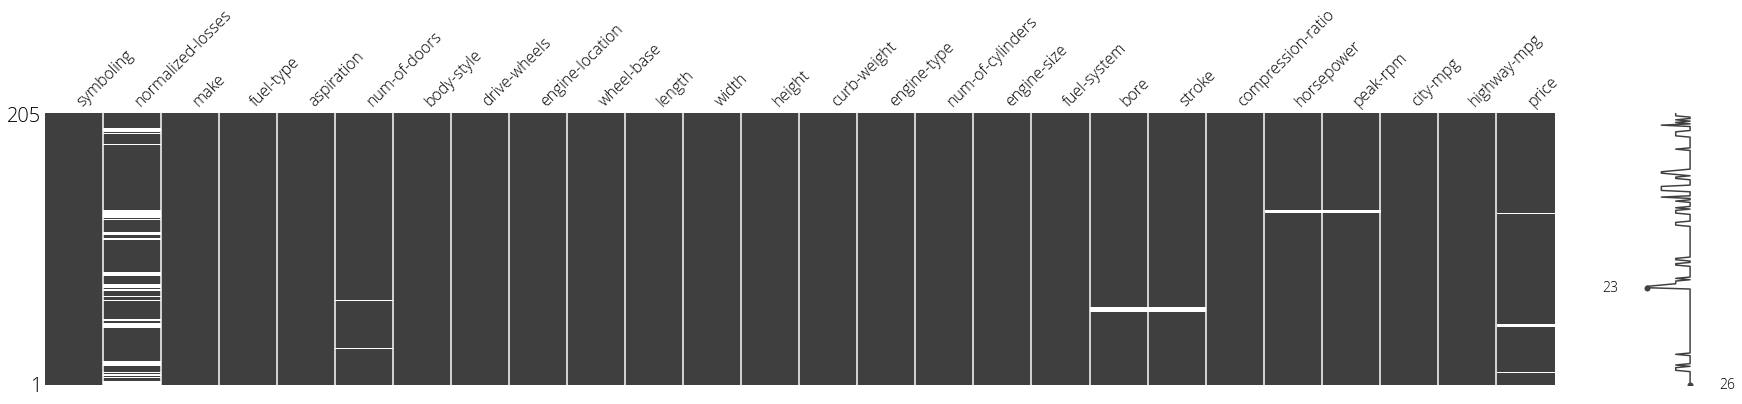

In [3]:
# Visual inspection of missing values
missingno.matrix(data, figsize = (30,5))
plt.show()

In [4]:
data.dropna(subset=["num-of-doors", "bore", "stroke", "horsepower", \
                    "peak-rpm", "price"], axis=0, inplace=True)

In [5]:
# We can drop normalized losses column to simplify our analysis
# data.drop(columns=["normalized-losses"], inplace=True)

# Alternatively, we could insert the missing values with its mean
mean = data["normalized-losses"].mean()
data["normalized-losses"].replace(np.nan, mean, inplace=True)

In [6]:
# Train test split
X, y = data[["engine-size"]], data[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                    random_state=0)

In [7]:
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8083719280295969

In [8]:
model.alpha  #default alpha

1.0

In [9]:
model = Ridge(alpha=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8083737592693316

In [10]:
# training score
model.score(X_train, y_train)

0.7815230160367233